In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import shap

In [2]:
def model_evaluation(X_train, y_train, X_test, y_test, model):
    print(f" Test MAE: {mean_absolute_error(y_test, model.predict(X_test))}")
    print(f" Train MAE: {mean_absolute_error(y_train, model.predict(X_train))}")
    print(f" Train Accuracy: {model.score(X_train, y_train)}")
    print(f" Test Accuracy: {model.score(X_test, y_test)}")

In [3]:
df = pd.read_csv('seasonal_phen_dataset.csv')

In [4]:
df.shape

(3224, 340)

In [5]:
df.columns

Index(['plot code', 'Season code', 'Sitlav - Soybeans - Yield - KG/Ha',
       'mean_phen_savi2_1', 'max_phen_savi2_1', 'std_phen_savi2_1',
       'skew_phen_savi2_1', 'kurt_phen_savi2_1', 'mean_phen_savi2_2',
       'max_phen_savi2_2',
       ...
       'mean_sand_15_30', 'mean_sand_5_15', 'mean_silt_0_5', 'mean_silt_15_30',
       'mean_silt_30_60', 'mean_silt_5_15', 'mean_soc_0_5', 'mean_soc_15_30',
       'mean_soc_30_60', 'mean_soc_5_15'],
      dtype='object', length=340)

In [6]:
df.describe()

,Sitlav - Soybeans - Yield - KG/Ha,mean_phen_savi2_1,max_phen_savi2_1,std_phen_savi2_1,skew_phen_savi2_1,kurt_phen_savi2_1,mean_phen_savi2_2,max_phen_savi2_2,std_phen_savi2_2,skew_phen_savi2_2,...,mean_sand_15_30,mean_sand_5_15,mean_silt_0_5,mean_silt_15_30,mean_silt_30_60,mean_silt_5_15,mean_soc_0_5,mean_soc_15_30,mean_soc_30_60,mean_soc_5_15
count,3224.000000,1669.000000,1669.000000,1.669000e+03,1669.000000,1669.000000,2028.000000,2028.000000,2028.000000,2028.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,3586.850651,0.017801,0.018206,3.872191e-04,-1.992028,5.230170,0.029506,0.032386,0.002696,-1.757459,...,544.511713,568.361451,508.629592,162.989447,158.408881,164.391844,69.130236,197.450177,125.050467,230.824108
std,864.298384,0.002679,0.002983,9.718779e-04,0.186608,0.421788,0.007453,0.008153,0.003243,0.516579,...,52.471150,48.568028,59.458351,35.547865,35.088995,34.759664,20.301100,28.209287,16.954874,30.248616
min,285.900000,0.004527,0.004527,0.000000e+00,-2.236060,4.652421,0.005163,0.005163,0.000000,-2.443554,...,365.586207,411.137931,310.384615,88.960784,86.490196,93.686275,48.333333,101.622951,78.721311,152.928571
25%,3235.150000,0.016295,0.016548,0.000000e+00,-2.000000,4.998375,0.023688,0.025533,0.000000,-2.000000,...,508.761905,534.000000,472.340909,136.400000,131.645833,137.666667,57.068966,178.631579,113.219512,208.451613
50%,3600.000000,0.017872,0.018077,0.000000e+00,-2.000000,4.998675,0.029008,0.032927,0.001257,-2.000000,...,543.365854,568.368421,503.192308,154.500000,150.963820,156.131661,63.538462,194.085759,124.851852,228.629743
75%,3966.750000,0.019245,0.019733,2.120000e-18,-2.000000,4.999319,0.034738,0.039050,0.005017,-1.565518,...,579.890489,600.880609,542.058824,188.363636,181.583333,189.466667,73.264035,216.633333,136.666667,249.388889
max,35220.000000,0.039335,0.039335,7.786745e-03,-0.034703,5.999468,0.052073,0.052073,0.017969,0.434281,...,678.769231,678.433333,668.433333,271.176471,272.058824,263.294118,212.195652,285.809524,187.761905,417.538461


Text(0, 0.5, 'count')

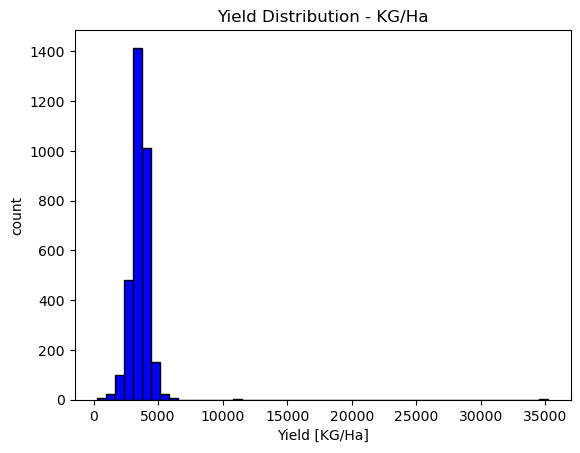

In [7]:
# matplotlib histogram
plt.hist(df['Sitlav - Soybeans - Yield - KG/Ha'], color = 'blue', edgecolor = 'black', bins = 50)
# Add labels
plt.title('Yield Distribution - KG/Ha')
plt.xlabel('Yield [KG/Ha]')
plt.ylabel('count')

*Normal distribution except for a small number of anomalies

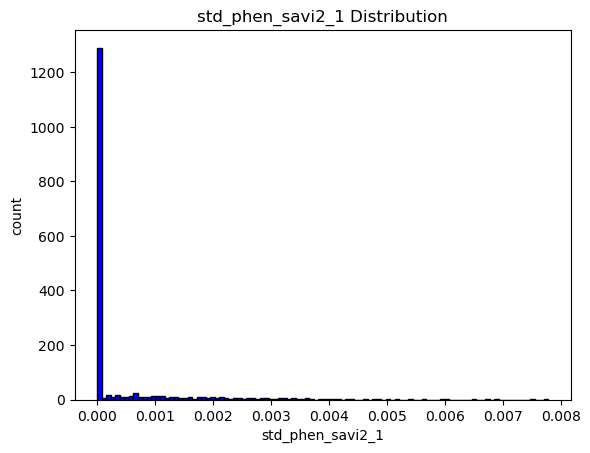

In [8]:
# matplotlib histogram
plt.hist(df['std_phen_savi2_1'], color = 'blue', edgecolor = 'black', bins = 100)
# Add labels
plt.title('std_phen_savi2_1 Distribution')
plt.xlabel('std_phen_savi2_1')
plt.ylabel('count');

Text(0, 0.5, 'count')

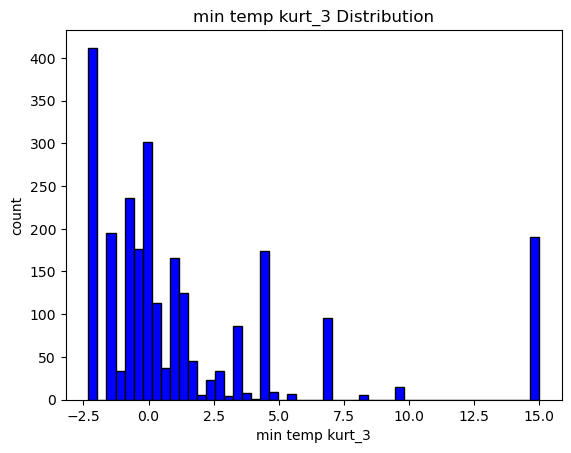

In [9]:
# matplotlib histogram
plt.hist(df['min tempkurt_3'], color = 'blue', edgecolor = 'black', bins = 50)
# Add labels
plt.title('min temp kurt_3 Distribution')
plt.xlabel('min temp kurt_3')
plt.ylabel('count')

In [10]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
names = ['min tempkurt_1', 'min tempkurt_2', 'min tempkurt_3', 'min tempkurt_4']
x1 = df['min tempkurt_1']
x2 = df['min tempkurt_2']
x3 = df['min tempkurt_3']
x4 = df['min tempkurt_4']

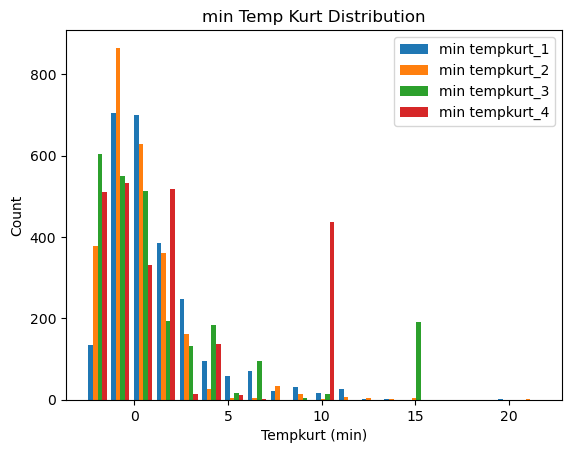

In [11]:
plt.hist([x1, x2, x3, x4], bins = 20, color = colors, label=names)
plt.legend()
plt.xlabel('Tempkurt (min)')
plt.ylabel('Count')
plt.title('min Temp Kurt Distribution');

In [12]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
names = ['soc', 'silt', 'sand', 'clay', 'cec']

In [13]:
x1 = df['mean_soc_5_15']
x2 = df['mean_silt_5_15']
x3 = df['mean_sand_5_15']
x4 = df['mean_clay_5_15']
x5 = df['mean_cec_5_15']

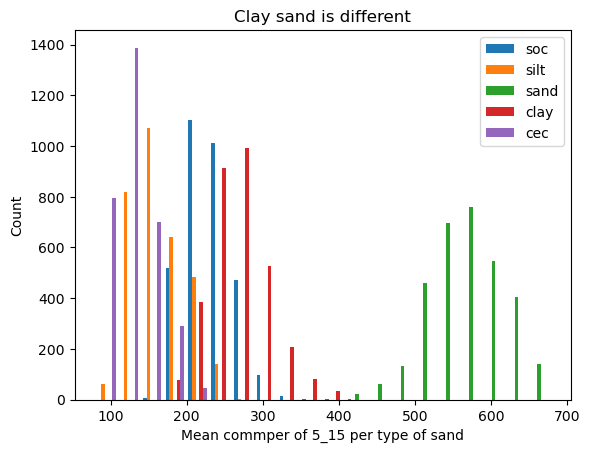

In [14]:
plt.hist([x1, x2, x3, x4, x5], bins = 20, color = colors, label=names)
plt.legend()
plt.xlabel('Mean commper of 5_15 per type of sand')
plt.ylabel('Count');
plt.title('Clay sand is different');

In [15]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
names = ['soc', 'silt', 'clay', 'cec']

In [16]:
x1 = df['mean_soc_30_60']
x2 = df['mean_silt_30_60']
x3 = df['mean_clay_30_60']
x4 = df['mean_cec_30_60']

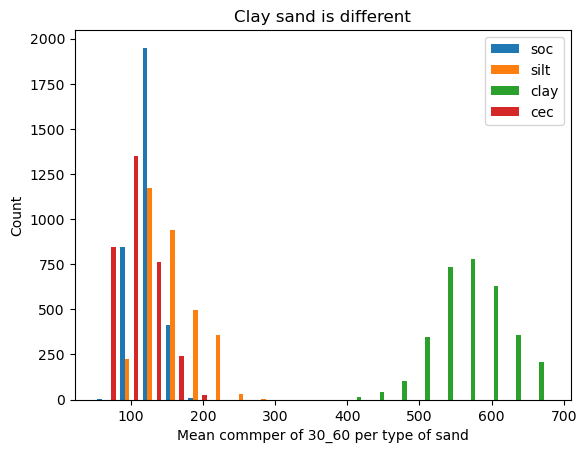

In [17]:
plt.hist([x1, x2, x3, x4], bins = 20, color = colors, label=names)
plt.legend()
plt.xlabel('Mean commper of 30_60 per type of sand')
plt.ylabel('Count');
plt.title('Clay sand is different');